In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import time

from math import *

In [10]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=50
L=n*T

N_grid=20000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

In [11]:
p=int(round(T/h))
st=200
fn=19799

In [14]:
m_s=weight*np.linspace(0.199, 0.22, 50)
q_s=[]

for m in m_s:
    start = time.time()
    A=0.01*weight
    B=W*0.01
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    q_s.append(q)
    print(m,'------', q, ' ------ ', stop-start)
    
np.savetxt('PT2109_50_20000_ksin_m.out', q_s, delimiter=',')

1.99 ------ 683.989187536  ------  10.028705358505249
1.99428571429 ------ 676.106662744  ------  9.677663564682007
1.99857142857 ------ 676.565106842  ------  9.773809909820557
2.00285714286 ------ 521.131206992  ------  9.744600772857666
2.00714285714 ------ 509.953544211  ------  9.750426530838013
2.01142857143 ------ 503.819731593  ------  9.750035285949707
2.01571428571 ------ 504.549325192  ------  10.155712842941284
2.02 ------ 504.153834226  ------  9.697476863861084
2.02428571429 ------ 498.793676784  ------  9.604438304901123
2.02857142857 ------ 494.0800834  ------  9.927477359771729
2.03285714286 ------ 334.819817745  ------  9.833750247955322
2.03714285714 ------ 332.897904783  ------  10.264040470123291
2.04142857143 ------ 330.355961711  ------  10.896378517150879
2.04571428571 ------ 329.856956843  ------  10.799662590026855
2.05 ------ 329.990637106  ------  10.176912307739258
2.05428571429 ------ 325.134542936  ------  9.885645151138306
2.05857142857 ------ 252.225610

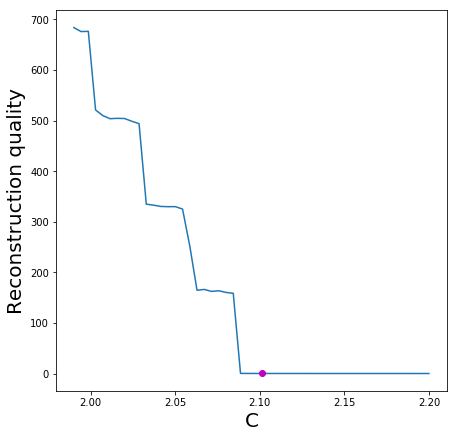

In [20]:
plt.figure(figsize=(7,7))
plt.xlabel(r'C', fontsize=20)
plt.ylabel(r'Reconstruction quality', fontsize=20)
plt.plot(m_s, q_s)
plt.plot(m_s[26], q_s[26], 'mo')
plt.show()

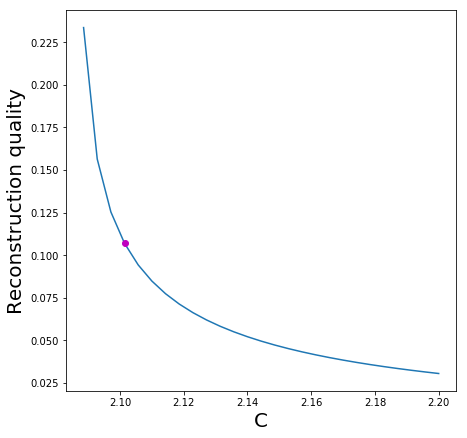

In [21]:
plt.figure(figsize=(7,7))
plt.xlabel(r'C', fontsize=20)
plt.ylabel(r'Reconstruction quality', fontsize=20)
plt.plot(m_s[23:], q_s[23:])
plt.plot(m_s[26], q_s[26], 'mo')
plt.show()

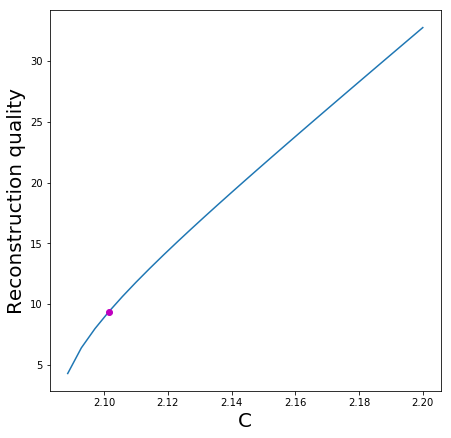

In [23]:
plt.figure(figsize=(7,7))
plt.xlabel(r'C', fontsize=20)
plt.ylabel(r'Reconstruction quality', fontsize=20)
plt.plot(m_s[23:], np.divide(1, q_s[23:]))
plt.plot(m_s[26], 1/q_s[26], 'mo')
plt.show()

In [26]:


import matplotlib.animation as manimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(0, 5))
l1, = ax.plot([], [], 'b')
l2, = ax.plot([], [], 'r')

def init():
    l1.set_data([], [])
    l2.set_data([], [])
    return l1, l2,


def animate(k):
    m_s=weight*np.linspace(0.22, 0.199, 50)
    m=m_s[k]
    start = time.time()
    A=0.01*weight
    B=W*0.01
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    print(k,'------', q, ' ------ ', stop-start)
    
    l1.set_data(t, k0)
    l2.set_data(t, k_hat)

    return l1, l2,

anim = manimation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, blit=True)

anim.save('sink_m_anim.mp4', fps=3, extra_args=['-vcodec', 'libx264'])

0 ------ 0.0305306428279  ------  9.608770847320557
1 ------ 0.0314477573511  ------  9.743428468704224
2 ------ 0.032422507069  ------  9.581708908081055
3 ------ 0.0334607400585  ------  9.363831758499146
4 ------ 0.0345691553058  ------  9.333497762680054
5 ------ 0.0357554688656  ------  9.461159229278564
6 ------ 0.0370286217557  ------  9.288753509521484
7 ------ 0.0383990426796  ------  9.37770390510559
8 ------ 0.0398789836895  ------  9.366528749465942
9 ------ 0.0414829542419  ------  9.17011046409607
10 ------ 0.0432282900201  ------  9.207994222640991
11 ------ 0.0451359095082  ------  9.146602869033813
12 ------ 0.0472313371259  ------  9.195106029510498
13 ------ 0.0495461129425  ------  9.206010103225708
14 ------ 0.0521197766552  ------  9.188539266586304
15 ------ 0.0550027283006  ------  9.145922183990479
16 ------ 0.0582604702711  ------  9.238121271133423
17 ------ 0.061980106635  ------  9.236483097076416
18 ------ 0.0662806934707  ------  9.20707368850708
19 -----

In [27]:


import matplotlib.animation as manimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(1.85, 2.25))
l1, = ax.plot([], [], 'b')
l2, = ax.plot([], [], 'r')

def init():
    l1.set_data([], [])
    l2.set_data([], [])
    return l1, l2,


def animate(k):
    m_s=weight*np.linspace(0.22, 0.199, 50)
    m=m_s[k]
    start = time.time()
    A=0.01*weight
    B=W*0.01
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    print(k,'------', q, ' ------ ', stop-start)
    
    l1.set_data(t, k0)
    l2.set_data(t, k_hat)

    return l1, l2,

anim = manimation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, blit=True)

anim.save('sink_m_anim_large.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

0 ------ 0.0305306428279  ------  9.290739059448242
1 ------ 0.0314477573511  ------  9.177478075027466
2 ------ 0.032422507069  ------  9.240573644638062
3 ------ 0.0334607400585  ------  9.274239778518677
4 ------ 0.0345691553058  ------  9.323120594024658
5 ------ 0.0357554688656  ------  9.138067960739136
6 ------ 0.0370286217557  ------  9.21754789352417
7 ------ 0.0383990426796  ------  9.263328552246094
8 ------ 0.0398789836895  ------  9.255656242370605
9 ------ 0.0414829542419  ------  9.24201226234436
10 ------ 0.0432282900201  ------  9.24718689918518
11 ------ 0.0451359095082  ------  9.12161111831665
12 ------ 0.0472313371259  ------  9.207259893417358
13 ------ 0.0495461129425  ------  9.130677223205566
14 ------ 0.0521197766552  ------  9.294261932373047
15 ------ 0.0550027283006  ------  9.175606489181519
16 ------ 0.0582604702711  ------  9.260964393615723
17 ------ 0.061980106635  ------  9.221925735473633
18 ------ 0.0662806934707  ------  9.189481496810913
19 ------

In [30]:
B_s=W*np.linspace(0.001, 0.1, 50)
q_s=[]

for B in B_s:
    start = time.time()
    A=0.01*weight
    m=weight*0.22
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    q_s.append(q)
    print(B,'------', q, ' ------ ', stop-start)
    
np.savetxt('PT2109_50_20000_ksin_B_clean.out', q_s, delimiter=',')

0.00628318530718 ------ 0.00592578310675  ------  9.298682451248169
0.0189777841931 ------ 0.00679846441556  ------  9.355230808258057
0.031672383079 ------ 0.00770061263115  ------  9.426213502883911
0.044366981965 ------ 0.0110530751187  ------  9.533209562301636
0.0570615808509 ------ 0.0243379394884  ------  9.535504579544067
0.0697561797369 ------ 0.0305664508193  ------  10.064435243606567
0.0824507786228 ------ 0.0211537126462  ------  9.851051807403564
0.0951453775087 ------ 0.0153471496231  ------  10.295076370239258
0.107839976395 ------ 0.0139225112493  ------  9.876764297485352
0.120534575281 ------ 0.0163590032001  ------  10.198933124542236
0.133229174167 ------ 0.0227896381673  ------  9.752089262008667
0.145923773052 ------ 0.0304118069701  ------  10.337058067321777
0.158618371938 ------ 0.034217361763  ------  10.188354730606079
0.171312970824 ------ 0.0357717141043  ------  9.741334676742554
0.18400756971 ------ 0.0421302164372  ------  9.352023124694824
0.1967021685

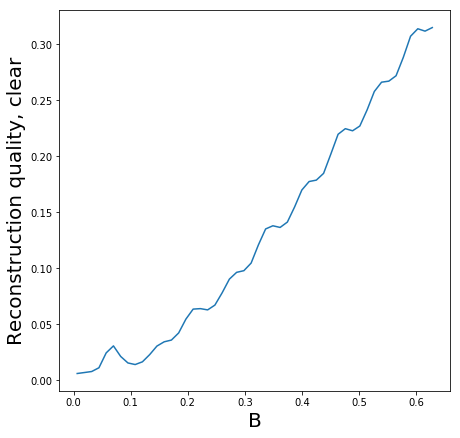

In [32]:
plt.figure(figsize=(7,7))
plt.xlabel(r'B', fontsize=20)
plt.ylabel(r'Reconstruction quality, clear', fontsize=20)
plt.plot(B_s, q_s)
#plt.plot(m_s[26], q_s[26], 'mo')
plt.show()

In [33]:
B_s=W*np.linspace(0.001, 0.1, 50)
q_s=[]

for B in B_s:
    start = time.time()
    A=0.01*weight
    m=weight*0.208
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    q_s.append(q)
    print(B,'------', q, ' ------ ', stop-start)
    
np.savetxt('PT2109_50_20000_ksin_B_break.out', q_s, delimiter=',')

0.00628318530718 ------ 0.0151118286454  ------  9.572932004928589
0.0189777841931 ------ 0.0255694175719  ------  10.763922214508057
0.031672383079 ------ 0.127290303453  ------  10.425843238830566
0.044366981965 ------ 134.441115972  ------  9.349943161010742
0.0570615808509 ------ 168.148475637  ------  9.4231858253479
0.0697561797369 ------ 123.617125638  ------  9.353715419769287
0.0824507786228 ------ 60.145205073  ------  9.346834182739258
0.0951453775087 ------ 0.159991841338  ------  9.456171035766602
0.107839976395 ------ 0.0926776566702  ------  9.406408548355103
0.120534575281 ------ 0.0870614915285  ------  9.38713264465332
0.133229174167 ------ 0.0993390943381  ------  9.57583236694336
0.145923773052 ------ 0.115847812567  ------  9.274342060089111
0.158618371938 ------ 0.126043728582  ------  9.805813074111938
0.171312970824 ------ 0.130209575097  ------  9.465981245040894
0.18400756971 ------ 0.140972450137  ------  9.988964080810547
0.196702168596 ------ 0.184104920275

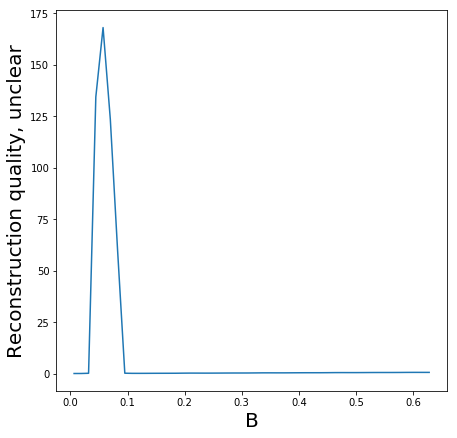

In [34]:
plt.figure(figsize=(7,7))
plt.xlabel(r'B', fontsize=20)
plt.ylabel(r'Reconstruction quality, unclear', fontsize=20)
plt.plot(B_s, q_s)
#plt.plot(m_s[26], q_s[26], 'mo')
plt.show()

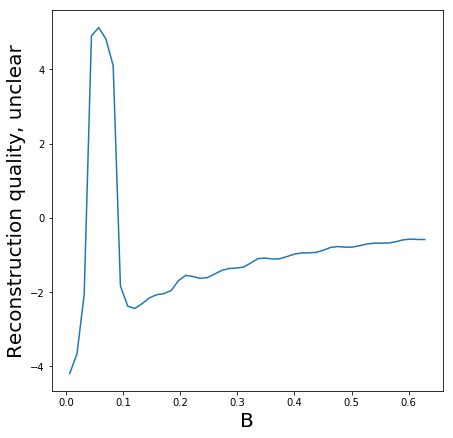

In [35]:
plt.figure(figsize=(7,7))
plt.xlabel(r'B', fontsize=20)
plt.ylabel(r'Reconstruction quality, unclear', fontsize=20)
plt.plot(B_s, np.log(q_s))
#plt.plot(m_s[26], q_s[26], 'mo')
plt.show()

In [40]:
A_s=weight*np.linspace(0, 0.1, 50)
q_s=[]

for A in A_s:
    start = time.time()
    B=0.01*W
    m=weight*0.2095
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    q_s.append(q)
    print(A,'------', q, ' ------ ', stop-start)
    
np.savetxt('PT2109_50_20000_ksin_A.out', q_s, delimiter=',')

0.0 ------ 2.46569704927e+21  ------  9.33043646812439
0.0204081632653 ------ 0.0529249766906  ------  9.3780996799469
0.0408163265306 ------ 0.0598842192838  ------  9.272838830947876
0.0612244897959 ------ 0.0704147123581  ------  9.371008157730103
0.0816326530612 ------ 0.0895276901142  ------  9.20615005493164
0.102040816327 ------ 0.151901767822  ------  9.79767107963562
0.122448979592 ------ 109.996260654  ------  9.322439908981323
0.142857142857 ------ 82.5136482184  ------  9.285059452056885
0.163265306122 ------ 125.274635978  ------  9.680242776870728
0.183673469388 ------ 100.022207286  ------  9.56101107597351
0.204081632653 ------ 121.170826803  ------  9.573074579238892
0.224489795918 ------ 102.657495304  ------  9.471362113952637
0.244897959184 ------ 87.739813649  ------  9.696802377700806
0.265306122449 ------ 98.9624623106  ------  9.408788442611694
0.285714285714 ------ 87.315575323  ------  9.170333623886108
0.30612244898 ------ 76.4186915852  ------  9.44194173812

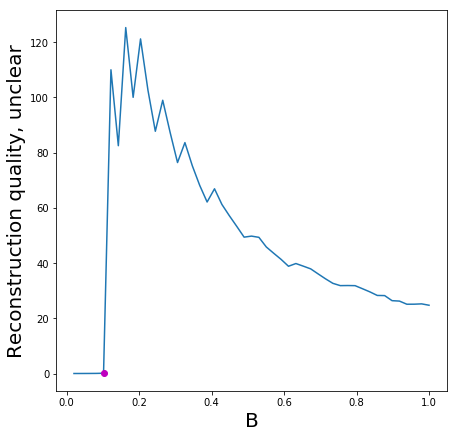

In [42]:
plt.figure(figsize=(7,7))
plt.xlabel(r'B', fontsize=20)
plt.ylabel(r'Reconstruction quality, unclear', fontsize=20)
plt.plot(A_s[1:], q_s[1:])
plt.plot(A_s[5], q_s[5], 'mo')
plt.show()

In [43]:
A_s=weight*np.linspace(0, 0.012, 50)
q_s=[]

for A in A_s:
    start = time.time()
    B=0.01*W
    m=weight*0.2095
    eps=1.7


    k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    stop = time.time()        
    q_s.append(q)
    print(A,'------', q, ' ------ ', stop-start)
    
np.savetxt('PT2109_50_20000_ksin_A_small.out', q_s, delimiter=',')

0.0 ------ 2.46569704927e+21  ------  9.678166389465332
0.00244897959184 ------ 0.0493318420592  ------  9.40492868423462
0.00489795918367 ------ 0.049190039837  ------  9.444791793823242
0.00734693877551 ------ 0.0496247863284  ------  9.791837215423584
0.00979591836735 ------ 0.0501652584445  ------  10.108206987380981
0.0122448979592 ------ 0.0507522379363  ------  10.213645696640015
0.014693877551 ------ 0.0513715511893  ------  10.09782099723816
0.0171428571429 ------ 0.0520190782425  ------  10.079252481460571
0.0195918367347 ------ 0.0526939139086  ------  10.429062128067017
0.0220408163265 ------ 0.0533964732438  ------  9.50655746459961
0.0244897959184 ------ 0.0541278455436  ------  9.769350290298462
0.0269387755102 ------ 0.0548895454861  ------  9.321933031082153
0.029387755102 ------ 0.0556834137969  ------  9.34484338760376
0.0318367346939 ------ 0.0565115827711  ------  9.312941074371338
0.0342857142857 ------ 0.0573764742191  ------  9.403677225112915
0.0367346938776 --

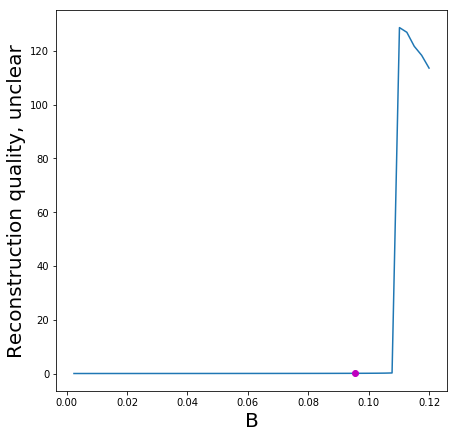

In [45]:
plt.figure(figsize=(7,7))
plt.xlabel(r'B', fontsize=20)
plt.ylabel(r'Reconstruction quality, unclear', fontsize=20)
plt.plot(A_s[1:], q_s[1:])
plt.plot(A_s[39], q_s[39], 'mo')
plt.show()

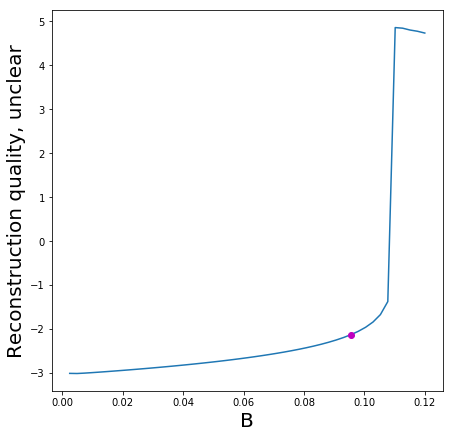

In [46]:
plt.figure(figsize=(7,7))
plt.xlabel(r'B', fontsize=20)
plt.ylabel(r'Reconstruction quality, unclear', fontsize=20)
plt.plot(A_s[1:], np.log(q_s[1:]))
plt.plot(A_s[39], np.log(q_s[39]), 'mo')
plt.show()